In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sin
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from copy import copy
from numpy import sin, cos, pi, sqrt, log
from numpy.random import normal
from random import random
from math import pi
from numpy import arctan
%matplotlib inline

# **Ficha 6 - Exercício 3**
## Realizado pelos alunos da licenciatura em Engenharia Física, do turno de terça-feira:
### Maria Gabriela Oliveira, A92841;
### Miguel Caçador Peixoto, A92838;






#####  6 de dezembro de 2021

# Problema:
No início do sec. XX, Ernest Rutherford e os seus colaboradores mostraram que quando uma partícula $α$ (i.e. um núcleo de hélio com dois
protões e dois neutrões) passa perto de um núcleo atómico $N$ é dispersada como mostrado na figura seguinte:
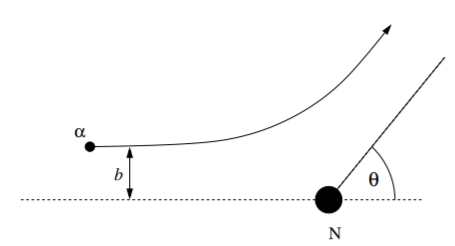

Esta dispersão obedece à seguinte relação:
\begin{aligned}
\tan{\frac{1}{2}\theta}=\frac{Ze^2}{2\pi\epsilon_0Eb}
\end{aligned}
em que $Z$ é o número atómico do núcleo, $e = −8.854×10^{−12} C$ é a carga do
eletrão, $ε_0 = 8,854×10^{−12}A^2s^4kg^{−1}m^{−3}$ é a constante de permissividade do vácuo, E é a energia cinética da partícula α e b é o parâmetro de impacto(i.e. a distância representada na figura).


Considere um feixe de partículas α com energia cinética de 7,7 MeV que
tem uma distribuição Gaussiana em x e em y com um desvio padrão de
$σ = a_0/100$, onde $a_0 = 5.292 × 10^{−11}$ m é o raio de Bohr, e que é disparado
contra uma folha fina de ouro (Z = 79). Calcule numericamente, usando
Monte Carlo, qual a probabilidade de uma partícula ser dispersa a um
ângulo maior que 90◦.


Nota: MeV é uma unidade de energia.

**Atenção:**
A carga de um eletrão não é a apresentada no enunciado, mas sim $-1,602×10^{−19}C$. Utilizou-se este valor nos calculos.


In [2]:
## Definir constantes
# Natureza
e = 1.602*10**(-19)
eps = 8.854 * 10**(-12)

# Especificas do ex
Z = 79
Ec = 7.7*10**6*e  # Converteu-se MeV para a unidade correspondente em SI (Joule).
a0 = 5.292*10**(-11)
sd = a0/100

# Número de lançamentos
N=1000000

# Definir a gaussiana
def gaussian(sd=sd):
  """
  Devolve 2 números em coordenadas cartesianas
  que respeitam a distribuição gaussiana
  com de média 0 e desvio padrão especifico.
  """
  # Gaussiana em coordenadas esféridas a 2D
  r = sqrt(-2*sd**2 *log(1-random()))
  theta = 2*pi*random()

  # Converter para coordenadas cartesianas.
  x = r*cos(theta)
  y = r*sin(theta)

  return (x,y)

# Função auxiliar para calcular o ângulo de dispersão
# dado o parâmetro de impacto, b
def calculate_dispersion(b, e=e, eps=eps, Z=Z, Ec=Ec):
    return 2*arctan((Z*e**2)/(2*pi*eps*Ec*b))


def probabilidade(N, thr, debug=True):
  """
  Dado um número de lançamentos, N ,e um threshold, thr,
  esta função irá calcular a probabilidade do lançamento
  obter um ângulo de dispersão, theta, maior que thr.
  """
  # Inicializar um contador que servirá para contar
  # o número de lançamentos onde se obtem theta > thr
  count=0

  # Para cada lançamento
  for _ in range(N):
    # Calcular o ponto de impacto e
    # consequentemente o parâmetro de impacto b 
    x,y=gaussian()
    b=sqrt(x**2+y**2)

    # Calcular o valor de theta para o b obtido.
    theta = calculate_dispersion(b)
    
    # Verificar se theta > thr
    # Se sim, incrementar contador.
    if theta>thr:
      count=count+1

  # Depois de executar todos os lançamentos,
  # podemos calcular finalmente a probabilidade do lançamento
  # obter um ângulo de dispersão maior que thr
  prob = (count/N)*100 # Prob está em %
  if debug:
    print(f"Nos {N} lançamentos executados, {count} obtiveram um ângulo de dispersão maior que thr, \nO que se traduz na percentagem de {prob:.5f}%")
  return prob


In [4]:
# Erro associado percentual
def erro(N,thr):
  Na=probabilidade(N,thr,debug=False)
  b=round((1/sqrt(N))*sqrt((Na/N)-(Na/N)**2)*100,5)
  print(f"\nO erro percentual associado à probabilidade da quantidade de lançamentos que obtiveram um ângulo superior a {thr:.4f} \nO é {b}%")
  return b

In [5]:
probabilidade(N, thr=pi/2)
erro(N,pi/2)

Nos 1000000 lançamentos executados, 1559 obtiveram um ângulo de dispersão maior que thr, 
O que se traduz na percentagem de 0.15590%

O erro percentual associado à probabilidade da quantidade de lançamentos que obtiveram um ângulo superior a 1.5708 
O é 4e-05%


4e-05

De modo a visualizar não só a probabilidade do lançamento obter um ângulo de dispersão maior que $\pi/2$, mas sim visualizar todas as probabilidades de todos os lançamentos para todos os possíveis valores de $\theta$ ($0<= \theta <= \pi$), fez-se o seguinte gráfico:

In [6]:
x = np.linspace(0, pi, num=1000)
y = np.array([probabilidade(N=1000, thr=i, debug=False) for i in x])


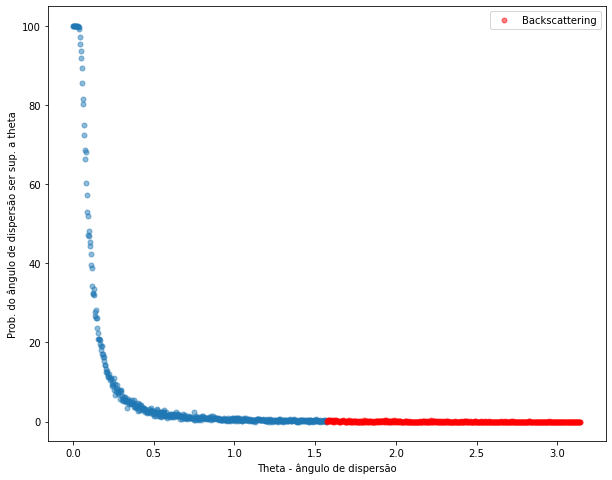

In [7]:
plt.figure(figsize=(10,8))
plt.plot(x[x<pi/2],y[x<pi/2], 'o', alpha=0.5, markersize=5)
plt.plot(x[x>pi/2],y[x>pi/2], 'ro', alpha=0.5, markersize=5, label='Backscattering')

plt.ylabel("Prob. do ângulo de dispersão ser sup. a theta")
plt.xlabel("Theta - ângulo de dispersão")
plt.legend()
plt.show()

Sendo que, os pontos com valores de $\theta$ superiores a $\pi/2$ foram pintados de vermelho pois ocorre o evento de retrodifusão (Backscattering). Ou seja, as particulas alfa são ricocheteadas pelo átomo alvo (voltam para trás).

O facto de isto acontecer é muito curioso uma vez que foi na experiência de Rutherford que se provou que o átomo não seguia o modelo do "pudim de passas". Sendo que algumas partículas alpha atravessam a folha de ouro mas que outras são repelidas, chegou-se a três grandes conclusões:


*   O facto de a grande maioria das partículas alfa atravessar a folha de ouro indica que a maior parte do átomo trata-se, na verdade, de espaços vazios. E não é massiço tal como teorizado no modelo do pudim de passas;


*   O facto de algumas partículas que atravessaram a folha de ouro terem sofrido um desvio na sua trajetória (terem um ângulo de dispersão) indica que elas se aproximaram de alguma região do átomo que tivesse a mesma carga que elas, isto é, carga positiva, sendo assim repelidas;

*   As poucas partículas que foram ricocheteadas pela folha de ouro indicam que o átomo possui uma região maciça que impedia essa passagem, com carga igual a elas, isto é, positiva.



## Dispersão de Rutherford

Aproveitando o contexto histórico do problema, Rutherford também elaborou uma fórmula que, para um dado detector com um ângulo específico em relação ao feixe incidente, devolve o número de partículas por unidade de superfície que colidem com o detector.

Essa fórmula é dada por:

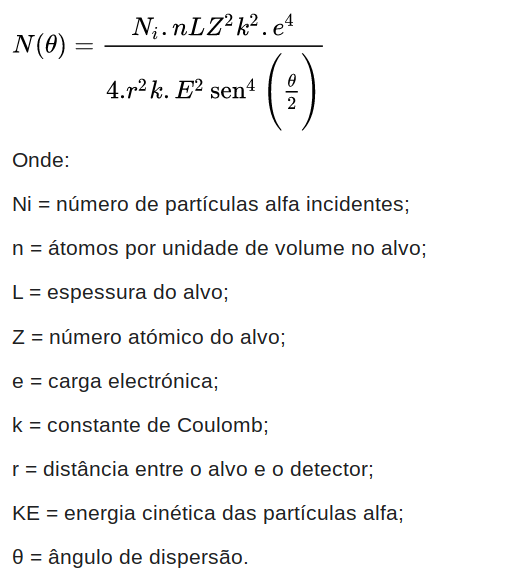

Fonte: https://pt.wikipedia.org/wiki/Dispers%C3%A3o_de_Rutherford

A fórmula acima traduz-se no seguinte gráfico:


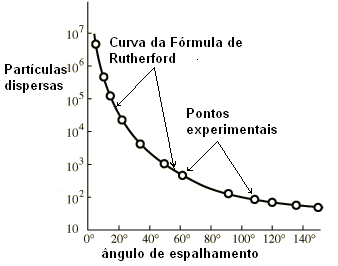


Note-se que se pode ver a curva teórica de Rutherford e uns pontos experimentais sobre esta.


Comparando este gráfico com o feito com base no método de Monte Carlo percebemos facilmente que apresentam a mesma morfologia. Ou seja, a nossa simulação, em princípio, forneceu-nos resultados fiavéis. 

Note-se que isto é apenas uma análise qualitativa uma vez que as condições da experiência podem não ser as mesmas e que pode haver algum tipo de erro sistemático que não afete significativamente a morfologia do gráfico, e daí aparentar estar correto na mesma.